In [114]:
from pandas import read_csv
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt


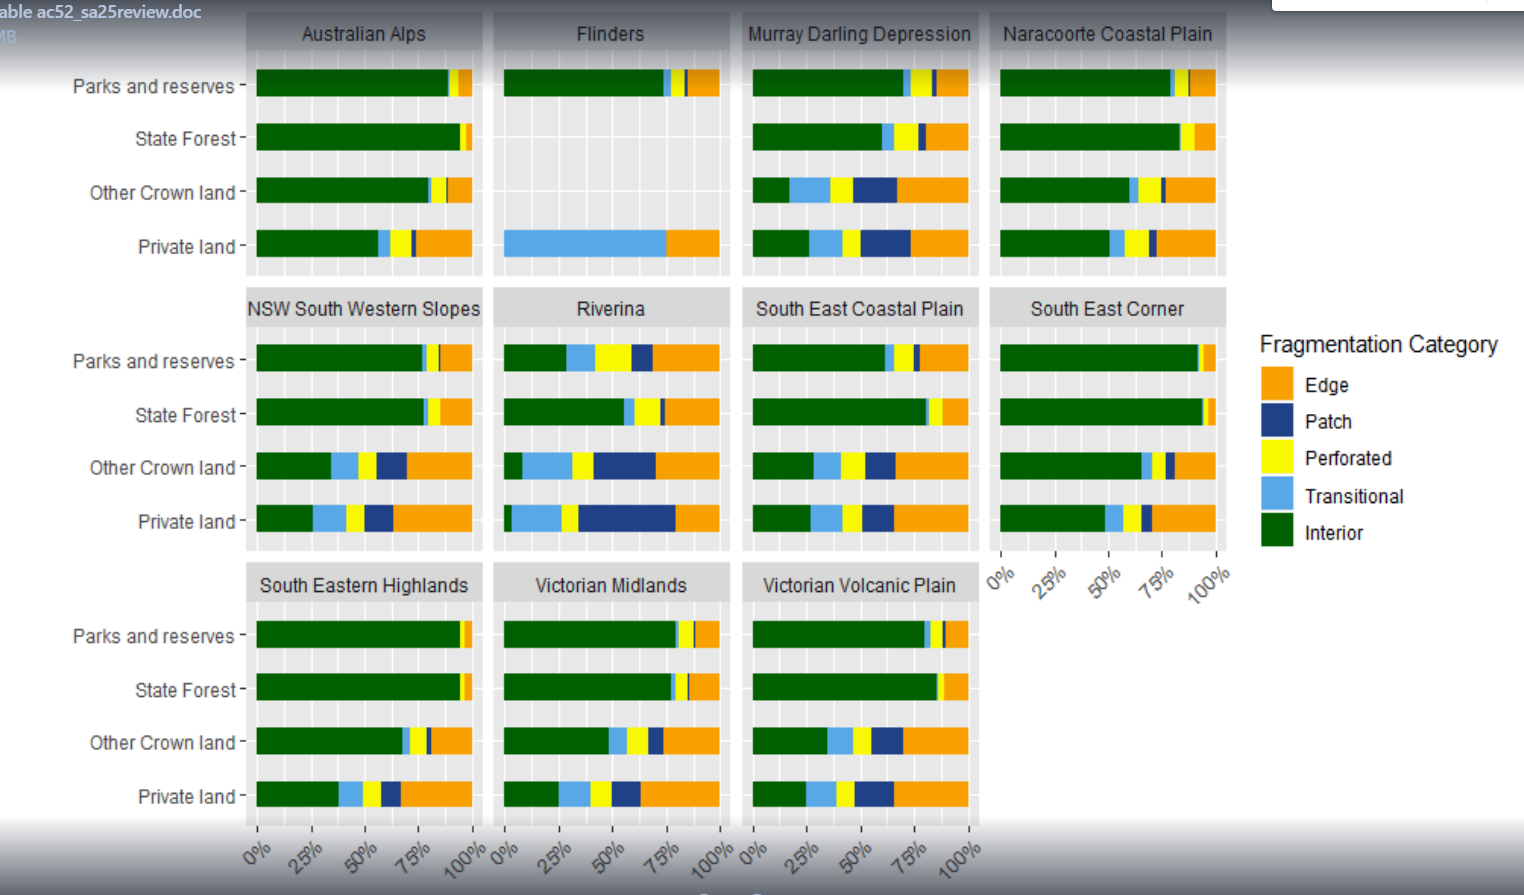

In [136]:
data = read_csv('table_plot_data.csv')

In [138]:
data.iloc[0]

bioregion         NARACOORTE COASTAL PLAIN
gridcode                                 1
label                     Parks & Reserves
local_area                     1155.981746
local_area_pct                     0.01965
sum_area                      58828.349181
Name: 0, dtype: object

In [139]:
data.label.value_counts()

Parks & Reserves    55
Private             55
State Forest        55
Other Crown Land    55
Name: label, dtype: int64

In [140]:
# add gridcode labels
# Grid code 1 - Patch | 2 - Transitional | 3 - Perforated | 4 - Edge | 5 - Interior | 0=nonforest 

data['frag_category'] = ''
data.loc[data.gridcode == 1, 'frag_category'] = 'Patch'
data.loc[data.gridcode == 2, 'frag_category'] = 'Transitional'
data.loc[data.gridcode == 3, 'frag_category'] = 'Perforated'
data.loc[data.gridcode == 4, 'frag_category'] = 'Edge'
data.loc[data.gridcode == 5, 'frag_category'] = 'Interior'
data.loc[data.gridcode == 0, 'frag_category'] = 'Non Forest'

In [141]:
# setup color codes to be used in plots

color_codes= {
    'Patch':'darkkhaki',
    'Transitional':'aquamarine',
    'Edge':'slategray',
    'Perforated':'lightcoral',
    'Interior':'forestgreen',
    'Non Forest':'navy'
}

In [142]:
frag_categories = data.frag_category.unique().tolist()
print(frag_categories)

['Patch', 'Transitional', 'Perforated', 'Edge', 'Interior']


In [143]:
data.frag_category.value_counts()

Patch           44
Transitional    44
Perforated      44
Edge            44
Interior        44
Name: frag_category, dtype: int64

In [144]:
data.head()

,bioregion,gridcode,label,local_area,local_area_pct,sum_area,frag_category
0,NARACOORTE COASTAL PLAIN,1,Parks & Reserves,1155.981746,0.019650,58828.349181,Patch
1,NARACOORTE COASTAL PLAIN,2,Parks & Reserves,2687.541198,0.045684,58828.349181,Transitional
2,NARACOORTE COASTAL PLAIN,3,Parks & Reserves,28462.054061,0.483815,58828.349181,Perforated
3,NARACOORTE COASTAL PLAIN,4,Parks & Reserves,2666.939874,0.045334,58828.349181,Edge
4,NARACOORTE COASTAL PLAIN,5,Parks & Reserves,23855.832303,0.405516,58828.349181,Interior


In [145]:
# let's test one subplot
bioregion = data.bioregion.unique()[0]
print(bioregion)
sub_plot_data = data.loc[data.bioregion == bioregion]

NARACOORTE COASTAL PLAIN


In [146]:
sub_plot_data.frag_category.value_counts()

Patch           4
Transitional    4
Perforated      4
Edge            4
Interior        4
Name: frag_category, dtype: int64

In [147]:
sub_plot_data.iloc[0]

bioregion         NARACOORTE COASTAL PLAIN
gridcode                                 1
label                     Parks & Reserves
local_area                     1155.981746
local_area_pct                     0.01965
sum_area                      58828.349181
frag_category                        Patch
Name: 0, dtype: object

ok, so now that we have a general layout we need to make a multipanel plot and we can make it 3 column by 4 rows.
- the 3rd column in the first row will be the legend
- the 1st column elements will have the y-axis notation
- only the 4th row will show the x-axis values


In [152]:
bioregions = data.bioregion.unique()
x_tick_location = [1, 2, 3, 4]
blank_x_ticks = ['', '', '', '']
y_tick_location = [0.2, 0.4, 0.6, 0.8, 1.0]
y_ticks = ['20%', '40%', '60%', '80%', '100%']
plot_locations = [[0,0], [0,1], [1,0], [1,1], [1,2], [2, 0], [2,1], [2,2], [3,0], [3, 1], [3,2]]


In [153]:
def make_plot(axs, local_plot_id, bioregion, color_codes, frag_categories, y_tick_locations, y_ticks):
    local_plot = axs[local_plot_id[0], local_plot_id[1]]
    y_offset = np.zeros(4)
    sub_plot_data = data.loc[data.bioregion == bioregion]
    for frag_cat in frag_categories:
        plot_subset = sub_plot_data.loc[sub_plot_data.frag_category == frag_cat]

        for local_label in plot_subset.label.unique().tolist():
            plot_subset.loc[
                plot_subset.label == local_label, 'local_area_pct'
            ] = plot_subset.loc[plot_subset.label == local_label].local_area_pct.sum()

        plot_subset.drop_duplicates(subset=['label'], inplace=True)
        x_data = plot_subset.label.to_numpy()
        plot_data = plot_subset.local_area_pct.to_numpy()    
        local_plot.set_title(bioregion)
        local_plot.grid(axis='y', linestyle = '--', color='black')
        local_plot.set_yticks(y_tick_locations)
        local_plot.set_yticklabels(y_ticks)
        local_plot.set_ylim([0, 1.1])
        plot = local_plot.bar(x_data, plot_data, bottom=y_offset, color=color_codes[frag_cat])
        y_offset = y_offset + plot_data

0 [0, 0] NARACOORTE COASTAL PLAIN
1 [0, 1] VICTORIAN VOLCANIC PLAIN
2 [1, 0] VICTORIAN MIDLANDS
3 [1, 1] SOUTH EAST COASTAL PLAIN
4 [1, 2] SOUTH EASTERN HIGHLANDS
5 [2, 0] MURRAY DARLING DEPRESSION
6 [2, 1] RIVERINA


C:\Users\ac4o\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ac4o\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\ac4o\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

7 [2, 2] NSW SOUTH WESTERN SLOPES
8 [3, 0] FLINDERS
9 [3, 1] AUSTRALIAN ALPS
10 [3, 2] SOUTH EAST CORNER


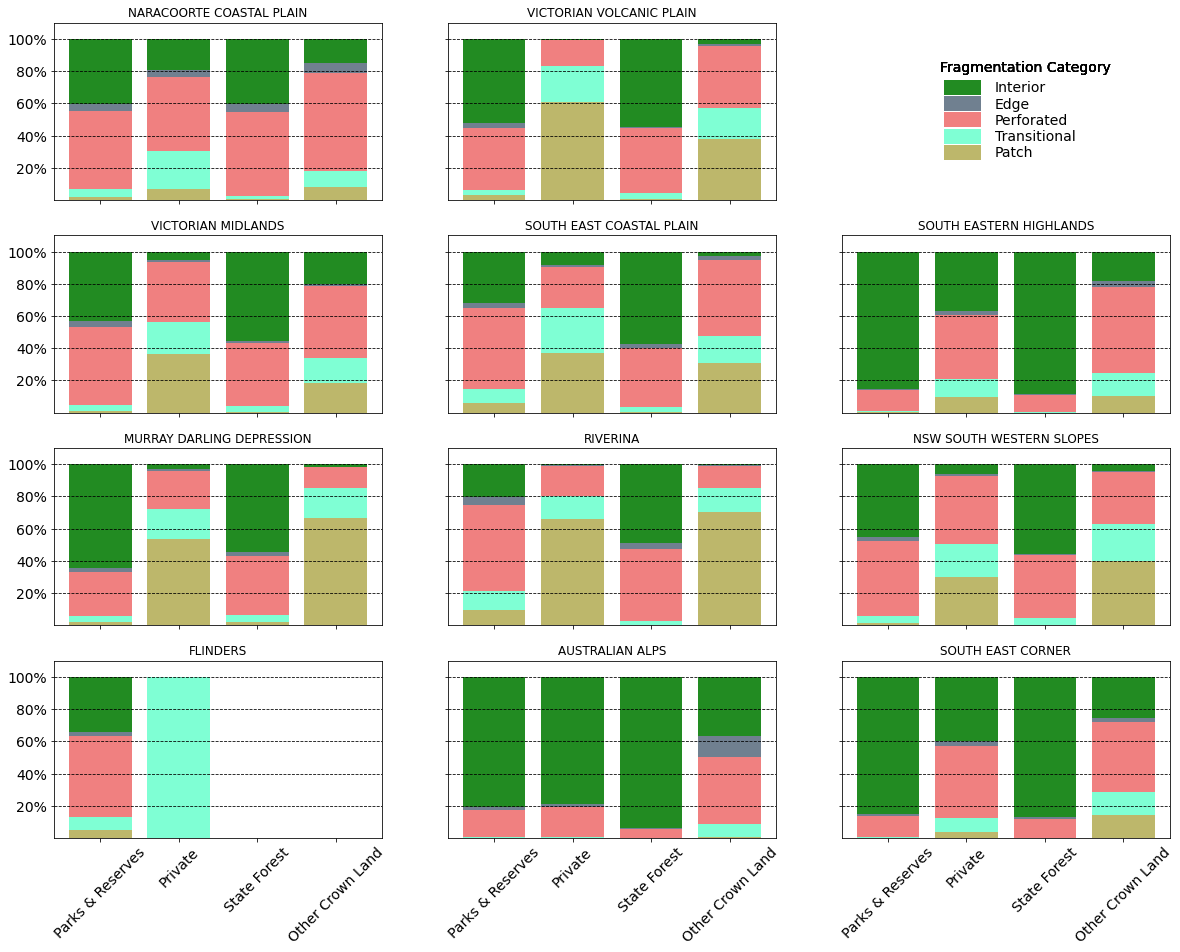

In [154]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
for index, bioregion in enumerate(bioregions):
    print(index, plot_locations[index], bioregion)
    make_plot(axs, plot_locations[index], bioregion, color_codes, frag_categories, y_tick_location,y_ticks)
    
for ax in fig.get_axes():
    ax.label_outer()

axs[3, 0].set_xticklabels(x_data, rotation=45)
axs[3, 1].set_xticklabels(x_data, rotation=45)
axs[3, 2].set_xticklabels(x_data, rotation=45)

# ok, now set up the legend in axs[0, 2]
axs[0, 2].axis('off')
for index, frag_cat in enumerate(frag_categories):
    local_color = color_codes[frag_cat]
    # now plot a thick line from 1 to 2 at 0.3 + index/10
    axs[0, 2].plot([1, 1.2], [0.3 + index/10, 0.3 + index/10], linewidth=15, color=local_color)
    axs[0, 2].text(1.4, 0.3 + index/10-0.03, frag_cat, fontsize=14)
    axs[0, 2].set_ylim([0, 1.1])
    axs[0, 2].set_xlim([0, 3])

    axs[0, 2].text(0.9, 0.8, 'Fragmentation Category', fontsize=14)

fig.savefig('f04_fragmentation_by_bioregion_2022.jpg')
